<a href="https://colab.research.google.com/github/Crispyjones7387/STOCK-Market/blob/master/Forecasting_without_future_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os

In [0]:
os.chdir("/content/drive/My Drive/")
!git clone https://github.com/Crispyjones7387/STOCK-Market.git 

In [5]:
os.chdir("/content/drive/My Drive/")
os.getcwd()

'/content/drive/My Drive'

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
AM = pd.read_csv("/content/drive/My Drive/STOCK-Market/Data/AMZN.csv") 
FB = pd.read_csv("/content/drive/My Drive/STOCK-Market/Data/FB.csv")
GOO = pd.read_csv("/content/drive/My Drive/STOCK-Market/Data/GOOG.csv")
NFL = pd.read_csv("/content/drive/My Drive/STOCK-Market/Data/NFLX.csv")   

In [0]:
#AM.head()

In [9]:
company_list = [AM, FB, GOO, NFL]
company_name = ["AMAZON", "FACEBOOK", "GOOGLE", "NETFLIX"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    company.set_index('Date',inplace=True)
    
df = pd.concat(company_list, axis=0)
df.sample(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2019-06-18,194.000000,194.529999,187.279999,188.470001,188.470001,37571400,FACEBOOK
2019-12-30,1350.000000,1353.000000,1334.020020,1336.140015,1336.140015,1050900,GOOGLE
2020-02-27,1362.060059,1371.703979,1317.170044,1318.089966,1318.089966,2978300,GOOGLE
2019-05-10,188.250000,190.000000,184.589996,188.339996,188.339996,12578500,FACEBOOK
2020-03-12,326.500000,335.720001,307.320007,315.250000,315.250000,12071600,NETFLIX
2020-01-08,213.000000,216.240005,212.610001,215.220001,215.220001,13475000,FACEBOOK
2019-08-14,308.010010,308.410004,298.010010,299.109985,299.109985,7355800,NETFLIX
2019-10-23,268.059998,273.920013,266.630005,271.269989,271.269989,7133500,NETFLIX
2020-03-18,139.750000,148.179993,137.100006,146.960007,146.960007,37553100,FACEBOOK


In [0]:
#df['Month']=pd.to_datetime(df['Date'])
#df.set_index('Date',inplace=True)

In [11]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2020-03-26,344.000000,363.839996,341.730011,362.989990,362.989990,7229600,NETFLIX
2020-03-27,359.089996,368.559998,353.000000,357.119995,357.119995,7948800,NETFLIX
2020-03-30,363.000000,377.799988,361.170013,370.959991,370.959991,8622000,NETFLIX
2020-03-31,367.929993,383.010010,366.440002,375.500000,375.500000,9366500,NETFLIX
2020-04-01,376.049988,380.230011,361.019989,364.079987,364.079987,6662600,NETFLIX


In [12]:
# Summary Stats
NFL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,330.457075,335.519131,325.422451,330.673319,330.673319,7.375750e+06
std,35.534663,35.981835,35.144185,35.470002,35.470002,4.297255e+06
min,255.710007,265.000000,252.279999,254.589996,254.589996,2.019300e+06
25%,298.649994,301.549988,293.279999,298.440002,298.440002,4.896400e+06
50%,335.000000,338.500000,331.019989,335.779999,335.779999,6.218800e+06
75%,363.200012,368.760010,357.299988,362.989990,362.989990,8.364600e+06
max,388.119995,393.519989,384.899994,387.779999,387.779999,3.825890e+07


In [13]:
# General info
NFL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253 entries, 2019-04-02 to 2020-04-01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


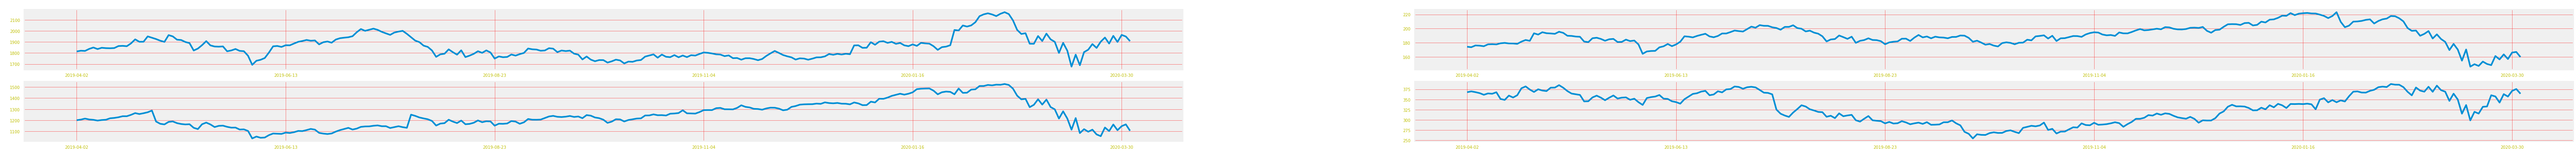

In [14]:
# Historical view of the closing price
plt.figure(figsize=(100, 90))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close',color='white')#I'm running it in dark mode that's why
    plt.xlabel(None)
    plt.tick_params(direction='out', length=6, width=2, colors='y',
               grid_color='r', grid_alpha=0.5)
    plt.title(f"{company_name[i - 1]}",color = 'white')

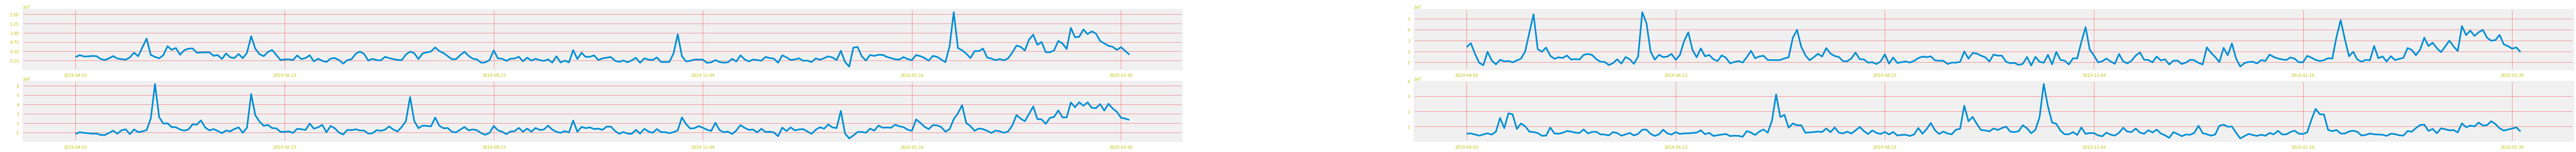

In [15]:
# Total volume of stock being traded each day
plt.figure(figsize=(100, 90))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume',color='white')
    plt.xlabel(None)
    plt.tick_params(direction='out', length=6, width=2, colors='y',
               grid_color='r', grid_alpha=0.5)
    plt.title(f"{company_name[i - 1]}",color='white')


**Calculate moving average:**
> ***A moving average is a technique to get an overall idea of the trends in a data set; it is an average of any subset of numbers. The moving average is extremely useful for forecasting long-term trends.***



In [0]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA-for-{ma}-days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [17]:
NFL.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name',
       'MA-for-10-days', 'MA-for-20-days', 'MA-for-50-days'],
      dtype='object')

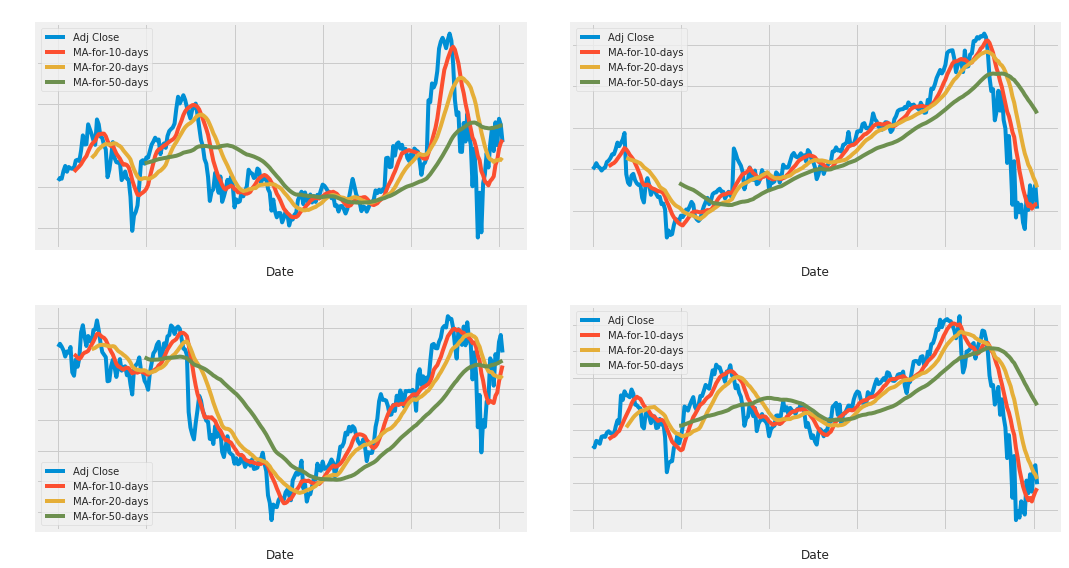

In [18]:
import matplotlib

matplotlib.rc('xtick', color = 'white')
matplotlib.rc('ytick', color = 'white')

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)


AM[['Adj Close', 'MA-for-10-days', 'MA-for-20-days', 'MA-for-50-days']].plot(ax=axes[0,0])
axes[0,0].set_title('AMAZON',color='white')

GOO[['Adj Close', 'MA-for-10-days', 'MA-for-20-days', 'MA-for-50-days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE',color='white')

NFL[['Adj Close', 'MA-for-10-days', 'MA-for-20-days', 'MA-for-50-days']].plot(ax=axes[1,0])
axes[1,0].set_title('NETFLIX',color='white')

FB[['Adj Close', 'MA-for-10-days', 'MA-for-20-days', 'MA-for-50-days']].plot(ax=axes[1,1])
axes[1,1].set_title('FACEBOOK',color='white')

fig.tight_layout()

**Now to Calculate daily returns:**
>
``` 
df.pct_change 
```
 *Percentage return between current and prior element from adjusted close*

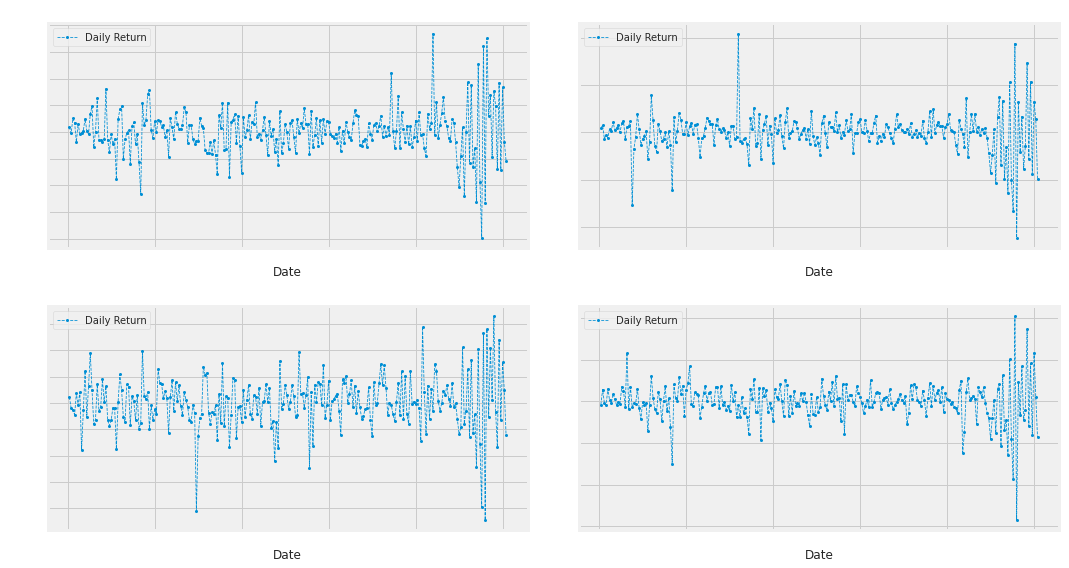

In [19]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AM[['Daily Return']].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o',
                          linewidth=0.8, markersize=2)
axes[0,0].set_title('AMAZON',color='white')

GOO[['Daily Return']].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o',
                           linewidth=0.8, markersize=2)
axes[0,1].set_title('GOOGLE',color='white')

NFL[['Daily Return']].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o',
                           linewidth=0.8, markersize=2)
axes[1,0].set_title('NETFLIX',color='white')

FB[['Daily Return']].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o',
                          linewidth=0.8, markersize=2)
axes[1,1].set_title('FACEBOOK',color='white')

fig.tight_layout()

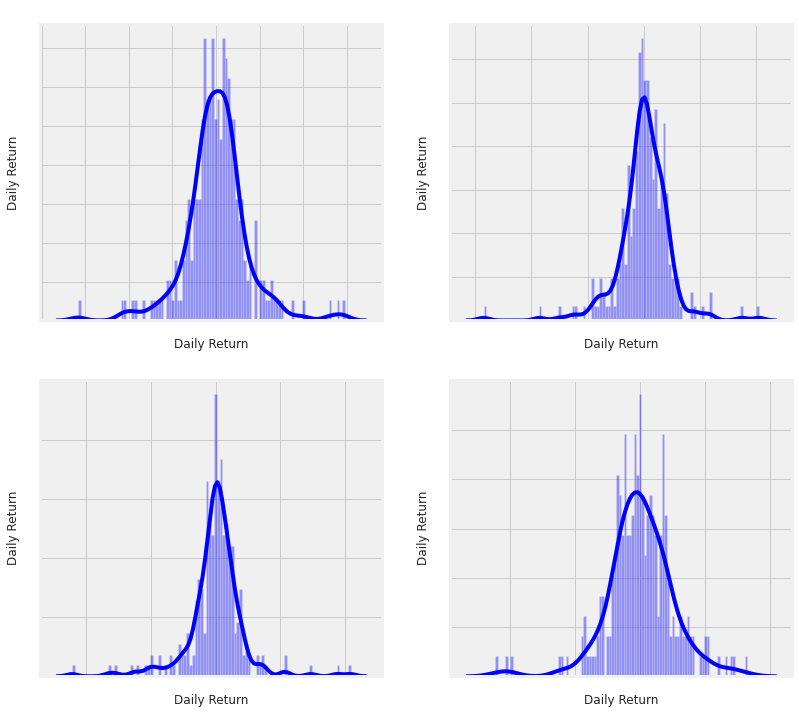

In [20]:
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='blue')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}',color='white')

In [0]:
#NFL['Daily Return'].hist()

In [0]:
AM1 = pd.read_csv("/content/drive/My Drive/STOCK-Market/Data/AMZN.csv",index_col=['Date'],usecols=['Date', 'Adj Close'])
AM1.columns=['AMAZON'] 
FB1 = pd.read_csv("/content/drive/My Drive/STOCK-Market/Data/FB.csv",index_col=['Date'],usecols=['Date', 'Adj Close'])
FB1.columns=['FACEBOOK'] 
GOO1 = pd.read_csv("/content/drive/My Drive/STOCK-Market/Data/GOOG.csv",index_col=['Date'],usecols=['Date', 'Adj Close'])
GOO1.columns=['GOOGLE'] 
NFL1 = pd.read_csv("/content/drive/My Drive/STOCK-Market/Data/NFLX.csv",index_col=['Date'],usecols=['Date', 'Adj Close'])   
NFL1.columns=['NETFLIX']

In [0]:
closing_df = pd.concat([AM1,FB1,GOO1,NFL1],axis=1)

In [0]:
#closing_df

**Calculate daily returns like before using PCT**

In [25]:
tech_rets = closing_df.pct_change()
tech_rets.head()

,AMAZON,FACEBOOK,GOOGLE,NETFLIX
Date,,,,
2019-04-02,NaN,NaN,NaN,NaN
2019-04-03,0.003705,-0.003789,0.004523,0.005521
2019-04-04,-0.001011,0.014291,0.007529,-0.005057
2019-04-05,0.010127,-0.001704,-0.006461,-0.006497
2019-04-08,0.006847,-0.004496,-0.002742,-0.011163


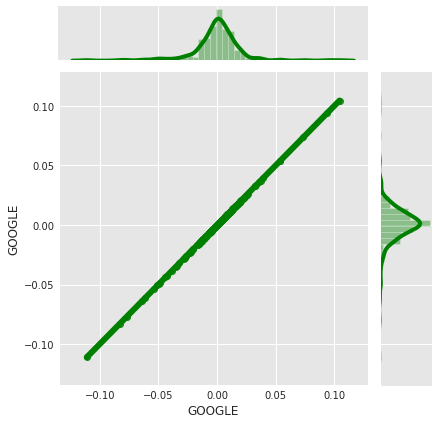

In [26]:
#Make sure correlation with itself is linear
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.jointplot('GOOGLE', 'GOOGLE', tech_rets, kind="reg",color='g')

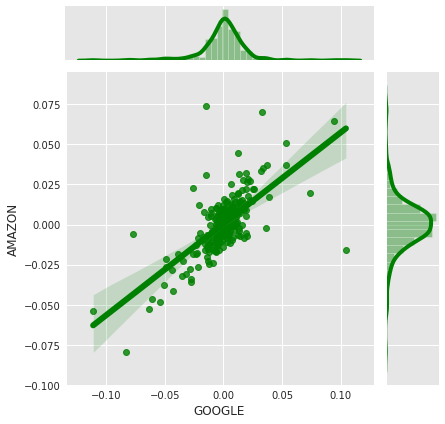

In [27]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.jointplot('GOOGLE', 'AMAZON', tech_rets, kind="reg",color='g')

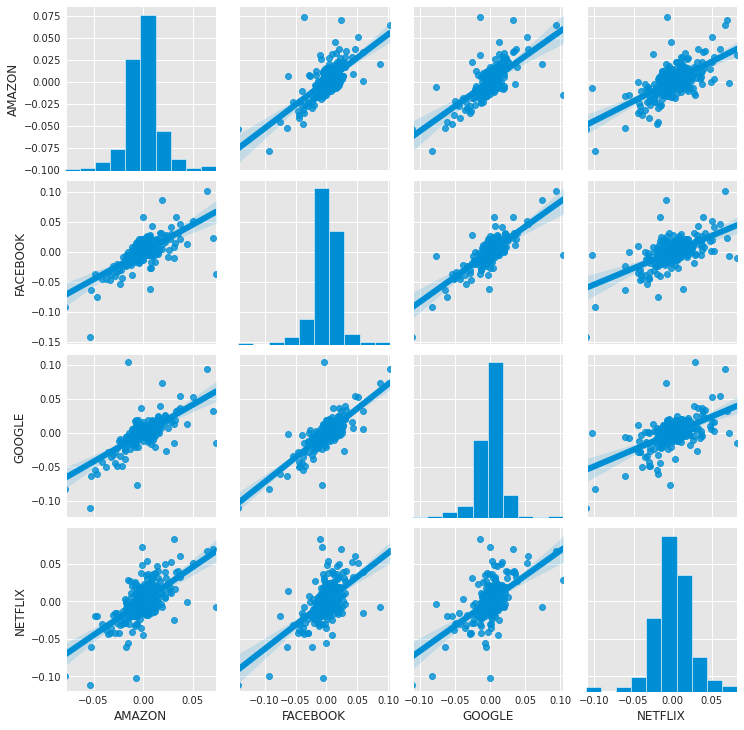

In [28]:
#Also try out with different combination of companies
sns.pairplot(tech_rets, kind='reg')

Text(0.5, 1.0, 'Adjusted closing correlation')

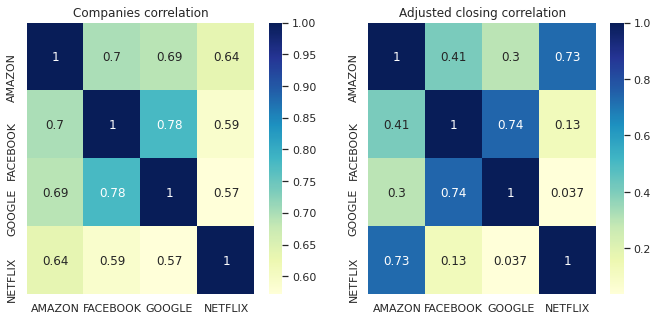

In [29]:
#use heatmap to find a correlation
sns.set(rc={'figure.figsize':(10,5)})
f, axes = plt.subplots(1, 2)

sns.heatmap(tech_rets.corr(), annot=True,cmap="YlGnBu", ax=axes[0]).set_title('Companies correlation')
sns.heatmap(closing_df.corr(), annot=True, cmap='YlGnBu',ax=axes[1]).set_title('Adjusted closing correlation')

**Calculate risk for each of the companies.**
*https://m.economictimes.com/wealth/invest/how-to-identify-calculate-risk-in-stocks-using-ms-excel/articleshow/69608883.cms*

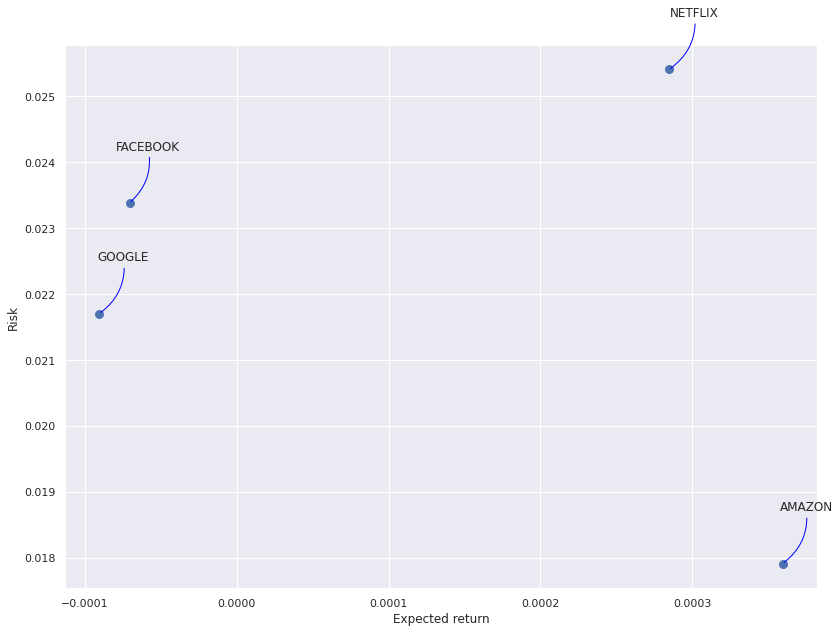

In [30]:
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

We can clearly see as of now Amazon has the highest return at a minimum risk

In [33]:
#You can also use datareader for getting stock values from yahoo finance
df = DataReader('AMZN', data_source='yahoo', start='2010-01-01', end='2020-04-02') #get 10 years of data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,136.610001,133.139999,136.250000,133.899994,7599900,133.899994
2010-01-05,135.479996,131.809998,133.429993,134.690002,8851900,134.690002
2010-01-06,134.729996,131.649994,134.600006,132.250000,7178800,132.250000
2010-01-07,132.320007,128.800003,132.009995,130.000000,11030200,130.000000
2010-01-08,133.679993,129.029999,130.559998,133.520004,9830500,133.520004
...,...,...,...,...,...,...
2020-03-27,1939.790039,1899.920044,1930.859985,1900.099976,5387900,1900.099976
2020-03-30,1973.630005,1912.339966,1922.829956,1963.949951,6126100,1963.949951
2020-03-31,1993.020020,1944.010010,1964.349976,1949.719971,5123600,1949.719971


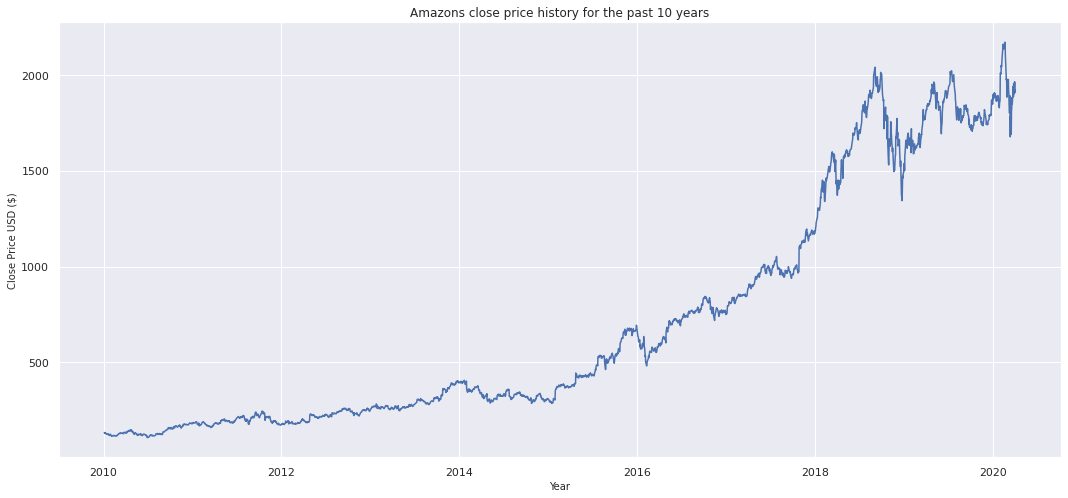

In [36]:
plt.figure(figsize=(16,8))
plt.title('Amazons close price history for the past 10 years')
plt.plot(df['Close'])
plt.xlabel('Year', fontsize=10)
plt.ylabel('Close Price USD ($)', fontsize=10)
plt.show()

Data for training purposes

In [37]:
data = df.filter(['Close'])
dataset = data.values #np array
training_data_len = int(np.ceil( len(dataset) * .8 ))
training_data_len

2064

MinMax Scaler:
$ \dfrac{x_i – min(x)}{max(x) – min(x)} $

shrinks the range such that the range is now between 0 and 1
![alt text](https://jovianlin.io/content/images/2017/12/standard-scaler.png)

In [121]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01226711],
       [0.01265031],
       [0.01146677],
       ...,
       [0.89304475],
       [0.87266262],
       [0.87806131]])

In [122]:
#from sklearn.model_selection import train_test_split

train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

#X_train, X_test, y_train, y_test = train_test_split(train_data,test_size=0.1)

[array([0.01226711, 0.01265031, 0.01146677, 0.01037539, 0.01208279,
       0.01052575, 0.00908998, 0.00994368, 0.00908998, 0.00898812,
       0.0092161 , 0.00832844, 0.00873589, 0.00621844, 0.00567517,
       0.00527258, 0.00685872, 0.00844971, 0.00814897, 0.00497669,
       0.0046129 , 0.00508826, 0.00355547, 0.00425881, 0.00398718,
       0.00456924, 0.00424426, 0.00556846, 0.00535989, 0.00432671,
       0.00373494, 0.0045935 , 0.00432186, 0.00455954, 0.00418605,
       0.00538899, 0.0046517 , 0.00474872, 0.00772697, 0.00820718,
       0.0083818 , 0.00966235, 0.00984667, 0.01042874, 0.00980302,
       0.01062276, 0.01211189, 0.01125819, 0.0109235 , 0.01124364,
       0.01102536, 0.01171414, 0.01054516, 0.01060336, 0.01001644,
       0.00942467, 0.01266971, 0.01282978, 0.01285888, 0.01356707])]
[0.013174171669768926]

[array([0.01226711, 0.01265031, 0.01146677, 0.01037539, 0.01208279,
       0.01052575, 0.00908998, 0.00994368, 0.00908998, 0.00898812,
       0.0092161 , 0.00832844, 0.0

In [0]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [124]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2004, 60, 1)

In [0]:
import tensorflow
from tensorflow.python.keras.layers import Dense, LSTM
from tensorflow.python.keras.models import Sequential


#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [165]:
#Train the model
history = model.fit(x_train, y_train, batch_size=120, epochs=4)

Epoch 1/4
17/17 [==============================] - 2s 98ms/step - loss: 1.6538e-04 - accuracy: 4.9900e-04
Epoch 2/4
17/17 [==============================] - 2s 100ms/step - loss: 5.4882e-05 - accuracy: 4.9900e-04
Epoch 3/4
17/17 [==============================] - 2s 98ms/step - loss: 3.8476e-05 - accuracy: 4.9900e-04
Epoch 4/4
17/17 [==============================] - 2s 97ms/step - loss: 3.8078e-05 - accuracy: 4.9900e-04


In [166]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [0]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [0]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [160]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(predictions, y_test))
rmse

49.649004828594364

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


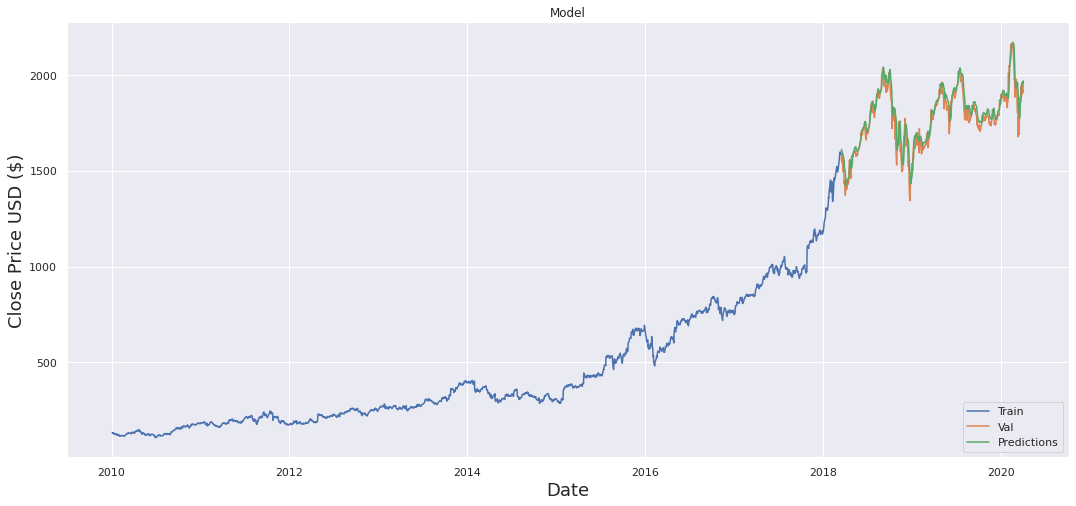

In [159]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [133]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-03-16,1571.680054,1502.373901
2018-03-19,1544.930054,1507.501709
2018-03-20,1586.510010,1508.900513
2018-03-21,1581.859985,1511.052490
2018-03-22,1544.920044,1513.041748
...,...,...
2020-03-27,1900.099976,1795.434326
2020-03-30,1963.949951,1806.903076
2020-03-31,1949.719971,1820.260742
